# importation du tableau de donnée

In [1]:
%matplotlib inline
import seaborn as sns
import pandas
import pandas as pd
import csv
import numpy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score


In [2]:
df=pd.read_csv('insertion_professionnelle.csv',sep=";")
df1=df [(df.annee == 2013) & (df.academie =="Paris") | (df.academie =="Créteil") | (df.academie =="Versailles")]

In [3]:
#df=pd.read_csv('insertion_professionnelle.csv',sep=";")
#df1=df [(df.annee == 2013) & (df.academie =="Paris")]

In [170]:
df1.head()

,annee,diplome,numero_de_l_etablissement,etablissement,code_de_l_academie,academie,code_du_domaine,domaine,code_de_la_discipline,discipline,...,de_diplomes_boursiers,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile,cle_etab,cle_disc
189,2012,MASTER LMD,0772502B,Paris-Est Marne-la-Vallée,A24,Créteil,DEG,"Droit, économie et gestion",disc05,"Autres formations juridiques, économiques et d...",...,12.0,9,2020,ns,ns,ns,1580,2530,Paris-Est Marne-la-Vallée_30,disc05_30
190,2012,MASTER LMD,0772502B,Paris-Est Marne-la-Vallée,A24,Créteil,SHS,Sciences humaines et sociales,disc11,Autres sciences humaines et sociales,...,12.0,9,2020,76,22,55,1580,2530,Paris-Est Marne-la-Vallée_30,disc11_30
191,2012,MASTER LMD,0781944P,Versailles Saint-Quentin-en-Yvelines,A25,Versailles,DEG,"Droit, économie et gestion",disc01,"Ensemble formations juridiques, économiques et...",...,11.0,9,2020,61,21,69,1580,2530,Versailles Saint-Quentin-en-Yvelines_30,disc01_30
192,2012,MASTER LMD,0781944P,Versailles Saint-Quentin-en-Yvelines,A25,Versailles,DEG,"Droit, économie et gestion",disc02,Droit,...,11.0,9,2020,72,29,78,1580,2530,Versailles Saint-Quentin-en-Yvelines_18,disc02_18
193,2012,MASTER LMD,0781944P,Versailles Saint-Quentin-en-Yvelines,A25,Versailles,DEG,"Droit, économie et gestion",disc03,Économie,...,11.0,9,2020,57,26,56,1580,2530,Versailles Saint-Quentin-en-Yvelines_30,disc03_30


In [4]:
#La commande .info() permet d'afficher la nature de nos données (catagorielle ou continue)
# Object signifie string, donc par forcément catégorielle.
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 189 to 5998
Data columns (total 31 columns):
annee                                            976 non-null int64
diplome                                          976 non-null object
numero_de_l_etablissement                        976 non-null object
etablissement                                    976 non-null object
code_de_l_academie                               976 non-null object
academie                                         976 non-null object
code_du_domaine                                  976 non-null object
domaine                                          976 non-null object
code_de_la_discipline                            976 non-null object
discipline                                       976 non-null object
situation                                        976 non-null object
remarque                                         150 non-null object
nombre_de_reponses                               972 non-null flo

In [32]:
# extraction de donnée de 2013 de la villde de paris
df12=df1.copy()
df12.index=np.array(df12.etablissement +" "+ df12.code_du_domaine+" "+df12.situation)
df12.drop(['etablissement','code_du_domaine', 'discipline', 'situation','annee','diplome','numero_de_l_etablissement',
          'code_de_l_academie','academie','domaine','code_de_la_discipline',
          'remarque','poids_de_la_discipline','cle_etab',
          'cle_disc'],axis=1,inplace=True)
#on suprime les ligne ayant des NaN
#df12=df12.dropna(how = 'any')
#df12=df12.fillna(df12.median())


In [171]:
df12.head()

,nombre_de_reponses,taux_de_reponse,taux_dinsertion,emplois_cadre_ou_professions_intermediaires,emplois_stables,emplois_a_temps_plein,salaire_net_median_des_emplois_a_temps_plein,salaire_brut_annuel_estime,de_diplomes_boursiers,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile
Paris-Est Marne-la-Vallée DEG 30 mois après le diplôme,12.0,81.0,ns,ns,ns,ns,ns,NaN,12.0,9,2020,ns,ns,ns,1580,2530
Paris-Est Marne-la-Vallée SHS 30 mois après le diplôme,88.0,78.0,91,94,55,99,2040,31700.0,12.0,9,2020,76,22,55,1580,2530
Versailles Saint-Quentin-en-Yvelines DEG 30 mois après le diplôme,271.0,60.0,89,87,71,98,2000,31200.0,11.0,9,2020,61,21,69,1580,2530
Versailles Saint-Quentin-en-Yvelines DEG 18 mois après le diplôme,57.0,62.0,91,85,47,92,2010,31300.0,11.0,9,2020,72,29,78,1580,2530
Versailles Saint-Quentin-en-Yvelines DEG 30 mois après le diplôme,61.0,67.0,85,90,63,96,1860,29000.0,11.0,9,2020,57,26,56,1580,2530


# netoyage des données: remplacement des ns par 25 (Admis)

In [34]:
""" Netoyage et transformation de la base de donnée"""

def is_number(s):
    try:
        t=float(s)
        return t
    except ValueError:
        return 0

def net_donnee(A):
    for i in A.columns:
        j1=np.array(A[i])
        for k in range(len(j1)):
            if 'ns'==j1[k] :
                A[i][k]=25 #  un taux d'insertion < à 30 on le fixe à 25
            elif 'nd'==j1[k]:
                A[i][k]=0  # nd non repondant 
    return A

tab = net_donnee(df12)
#tab = tab.fillna(tab.median())


C:\Users\ayadm\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ayadm\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
for k in tab.columns:
    if k not in ['nombre_de_reponses','taux_de_reponse','salaire_brut_annuel_estime' ]:
        tab[k]=tab[k].astype("float64")

In [36]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, Paris-Est Marne-la-Vallée DEG 30 mois après le diplôme to Cergy-Pontoise STS 30 mois après le diplôme
Data columns (total 16 columns):
nombre_de_reponses                               972 non-null float64
taux_de_reponse                                  938 non-null float64
taux_dinsertion                                  960 non-null float64
emplois_cadre_ou_professions_intermediaires      960 non-null float64
emplois_stables                                  960 non-null float64
emplois_a_temps_plein                            960 non-null float64
salaire_net_median_des_emplois_a_temps_plein     960 non-null float64
salaire_brut_annuel_estime                       340 non-null float64
de_diplomes_boursiers                            950 non-null float64
taux_de_chomage_regional                         976 non-null float64
salaire_net_mensuel_median_regional              976 non-null float64
emplois_cadre                        

In [46]:
# extraction de donnée de 2013 de la villde de paris
df12=df1.copy()
df12.index=np.array(df12.etablissement +" "+ df12.code_du_domaine+" "+df12.situation)
df12.drop(['etablissement','code_du_domaine', 'discipline', 'situation','annee','diplome','numero_de_l_etablissement',
          'code_de_l_academie','academie','domaine','code_de_la_discipline',
          'remarque','poids_de_la_discipline','cle_etab',
          'cle_disc'],axis=1,inplace=True)



In [47]:
# Regardons les NA
def Missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    print(missing_data[(percent>0)],'\n')
Missing_values(tab)

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 



# imputation des valeurs manquante

In [173]:
tab.head(n=3)

,nombre_de_reponses,taux_de_reponse,taux_dinsertion,emplois_cadre_ou_professions_intermediaires,emplois_stables,emplois_a_temps_plein,salaire_net_median_des_emplois_a_temps_plein,salaire_brut_annuel_estime,de_diplomes_boursiers,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile
Paris-Est Marne-la-Vallée DEG 30 mois après le diplôme,12.0,81.0,25.0,25.0,25.0,25.0,25.0,31200.0,12.0,9.0,2020.0,25.0,25.0,25.0,1580.0,2530.0
Paris-Est Marne-la-Vallée SHS 30 mois après le diplôme,88.0,78.0,91.0,94.0,55.0,99.0,2040.0,31700.0,12.0,9.0,2020.0,76.0,22.0,55.0,1580.0,2530.0
Versailles Saint-Quentin-en-Yvelines DEG 30 mois après le diplôme,271.0,60.0,89.0,87.0,71.0,98.0,2000.0,31200.0,11.0,9.0,2020.0,61.0,21.0,69.0,1580.0,2530.0


In [49]:
l=['salaire_brut_annuel_estime','salaire_net_mensuel_regional_3eme_quartile','salaire_net_mensuel_regional_1er_quartile',
  'taux_de_reponse','de_diplomes_boursiers','emplois_exterieurs_a_la_region_de_luniversite','femme','emploi_cadre',
  'salaire_net_median_des_emplois_a_temps_plein','emplois_satble','emplois_cadre_ou_professions_intermediares',
  'taux_dinsertion','nombre_de_reponse']
tab=tab.fillna(tab.median())
Missing_values(tab)

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 



,nombre_de_reponses,taux_de_reponse,taux_dinsertion,emplois_cadre_ou_professions_intermediaires,emplois_stables,emplois_a_temps_plein,salaire_net_median_des_emplois_a_temps_plein,salaire_brut_annuel_estime,de_diplomes_boursiers,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile
Paris-Est Marne-la-Vallée DEG 30 mois après le diplôme,12.0,81.000000,ns,ns,ns,ns,ns,31333.235294,12.000000,9,2020,ns,ns,ns,1580,2530
Paris-Est Marne-la-Vallée SHS 30 mois après le diplôme,88.0,78.000000,91,94,55,99,2040,31700.000000,12.000000,9,2020,76,22,55,1580,2530
Versailles Saint-Quentin-en-Yvelines DEG 30 mois après le diplôme,271.0,60.000000,89,87,71,98,2000,31200.000000,11.000000,9,2020,61,21,69,1580,2530
Versailles Saint-Quentin-en-Yvelines DEG 18 mois après le diplôme,57.0,62.000000,91,85,47,92,2010,31300.000000,11.000000,9,2020,72,29,78,1580,2530
Versailles Saint-Quentin-en-Yvelines DEG 30 mois après le diplôme,61.0,67.000000,85,90,63,96,1860,29000.000000,11.000000,9,2020,57,26,56,1580,2530
Versailles Saint-Quentin-en-Yvelines SHS 30 mois après le diplôme,45.0,68.000000,91,92,41,100,1600,25000.000000,11.000000,9,2020,36,14,76,1580,2530
Versailles Saint-Quentin-en-Yvelines SHS 30 mois après le diplôme,12.0,87.000000,ns,ns,ns,ns,ns,31333.235294,11.000000,9,2020,ns,ns,ns,1580,2530
Versailles Saint-Quentin-en-Yvelines SHS 18 mois après le diplôme,12.0,87.000000,ns,ns,ns,ns,ns,31333.235294,11.000000,9,2020,ns,ns,ns,1580,2530
Versailles Saint-Quentin-en-Yvelines STS 30 mois après le diplôme,22.0,80.000000,ns,ns,ns,ns,ns,31333.235294,11.000000,9,2020,ns,ns,ns,1580,2530
Versailles Saint-Quentin-en-Yvelines STS 18 mois après le diplôme,22.0,80.000000,ns,ns,ns,ns,ns,31333.235294,11.000000,9,2020,ns,ns,ns,1580,2530


# creation de la classe ACP

In [168]:

class projet:
    def __init__(self,df):
        """construiction du modèle avec les variable explicative et quantitative"""
        self._df=df
        #self._matrice_cov=matrice_cov

    def matrice_cov(self):#matrice de covariance
        pca=PCA()                    
        print(pca.fit(self._df))
        # Estimation, calcul des composantes principales : matrice de covariance
        comp_princ=pca.explained_variance_ratio_   
        return comp_princ
    
    def df(self):#la jeu de données
        #accesseur pour le model
        return self._df
    
    def matrice_covariance(self):#matrice de covariance
        #accesseur pour la matrice de cova
        return self._matrice_cov
    
    
    #Diagramme boîte des premières composantes principales.
    #en param on donne la matrice de covarience
    def repr_vp(self):#representation de valeurs propres
        pca=PCA()                    
        print(pca.fit(self._df))
        # Estimation, calcul des composantes principales : matrice de covariance
        comp_princ=pca.explained_variance_ratio_  
        plt.bar(numpy.arange(len( comp_princ))+0.5,  comp_princ)
        plt.title("Variance expliquée")
        
    #Diagramme boîte des premières composantes principales.
    #en param on donne le modèle (dataframe)
    
    def myPCA(self):#utilisation de l acp sur le jeu de données
        # Normalize data
        df0 = self._df
        df_norm = (df0 - df0.mean()) / df0.std()
        # PCA
        pca = PCA()
        pca_res = pca.fit_transform(df_norm.values)
        # Ebouli
        ebouli = pd.Series(pca.explained_variance_ratio_)
        coef = np.transpose(pca.components_)
        cols = ['PC-'+str(x) for x in range(len(ebouli))]
        pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
        return pc_infos, ebouli  

    def circleOfCorrelations(pc_infos, ebouli):#cercle de correlation
        plt.Circle((0,0),radius=10, color='g', fill=False)
        circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
        fig = plt.gcf()
        fig.gca().add_artist(circle1)
        for idx in range(len(pc_infos["PC-0"])):
            x = pc_infos["PC-0"][idx]
            y = pc_infos["PC-1"][idx]
            plt.plot([0.0,x],[0.0,y],'k-')
            plt.plot(x, y, 'rx')
            plt.annotate(pc_infos.index[idx], xy=(x,y))
        plt.xlabel("PC-1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
        plt.ylabel("PC-2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
        plt.xlim((-1,1))
        plt.ylim((-1,1))
        plt.title("Circle of Correlations")
    
    def boit_npre_comp(self):#reprentation des valeurs propre en diagrame en baton
        pca = PCA()
        c=pca.fit(self._df).transform(self._df)
        plt.boxplot(c[:,0:20])
        
#On affiche les fac dans le plan des deux premiers axes :
#en param on lui donne le modèle (datafram)            

    def repr_obs_plan(self):#representation des individu
       X_reduced = pca.transform(self._df)
       plt.figure(figsize=(18,6))
       plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
       for label, x, y in zip(self._df.index, X_reduced[:, 0],  X_reduced[:, 1]):
          plt.annotate(label,xy = (x, y), xytext = (-10, 10),
          textcoords = 'offset points', ha = 'right', va = 'bottom',
          bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = 0.5),
          arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        
def repr_obs_plan(l):#representation des individu
       X_reduced = pca.transform(l)
       plt.figure(figsize=(20,6))
       plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
       for label, x, y in zip(l.index, X_reduced[:, 0],  X_reduced[:, 1]):
          plt.annotate(label,xy = (x, y), xytext = (-10, 10),
          textcoords = 'offset points', ha = 'right', va = 'bottom',
          bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = 0.7),
          arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

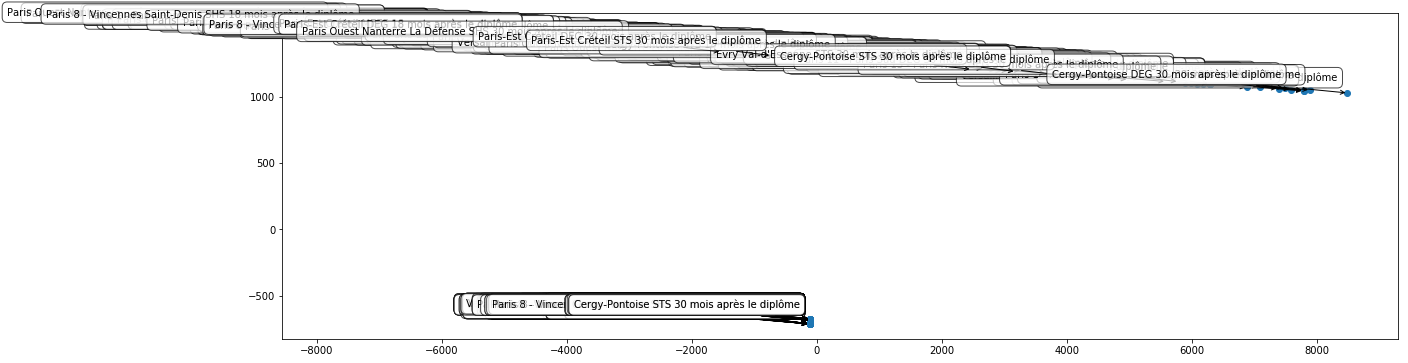

In [169]:
pca.transform(tab)
repr_obs_plan(tab)

In [51]:
#tab=df12
Missing_values(tab)

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 



In [184]:
#df_norm = (tab - tab.mean()) / tab.std()
#Missing_values(df_norm)

ValueError: operands could not be broadcast together with shapes (3024,) (12,) 

In [52]:
p1= projet(tab)
#p1.repr_obs_plan()
#p1.boit_npre_comp()

# netoyage des données: remplacement des ns par 25 (Admis)

In [10]:
"""
#pca=PCA()                    
#print(pca.fit(df12))
#  on aurait pu utiliser d autres methodes de types machine learning
#    mais celles la opposeront les conditions de l ennoncees il n est pas 
#    necessaire de remplcer toutes les valeurs manquantes par 25 mais les 
#    les valeurs manquantes de la variable taux_insertion 
#    ATTENTION je dois changer la fonction ci-deessou au lieu de mettre 
#    toute table je mets le vecteur tab.taux_insertion

def is_number(s):
    try:
        t=float(s)
        return t
    except ValueError:
        return 0

def net_donnee(A):
    for i in A.columns:
        j1=np.array(A[i])
        for k in range(len(j1)):
            if 'ns'==j1[k] :
                A[i][k]=25 #  un taux d'insertion < à 30 on le fixe à 25
            elif 'nd'==j1[k]:
                A[i][k]=0  # nd non repondant 
    return A

tab = net_donnee(df12)
tab = tab.fillna(tab.median())
""""

C:\Users\ayadm\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ayadm\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [53]:
y=tab["taux_dinsertion"]
X_train, X_test, y_train, y_test = train_test_split(tab, y, test_size=0.30, random_state=42)
del X_train["taux_dinsertion"]
del X_test["taux_dinsertion"]

In [54]:
#print(tab.describe())
print(X_train.describe())


       nombre_de_reponses  taux_de_reponse  \
count          683.000000       683.000000   
mean            52.884334        62.572474   
std             63.574925        14.297999   
min              0.000000         0.000000   
25%             12.500000        54.000000   
50%             31.000000        63.000000   
75%             73.000000        71.000000   
max            531.000000       100.000000   

       emplois_cadre_ou_professions_intermediaires  emplois_stables  \
count                                   683.000000       683.000000   
mean                                     52.114202        46.051245   
std                                      32.782968        26.798893   
min                                       0.000000         0.000000   
25%                                      25.000000        25.000000   
50%                                      25.000000        25.000000   
75%                                      88.000000        73.000000   
max              

Axes(0.125,0.125;0.62x0.755)


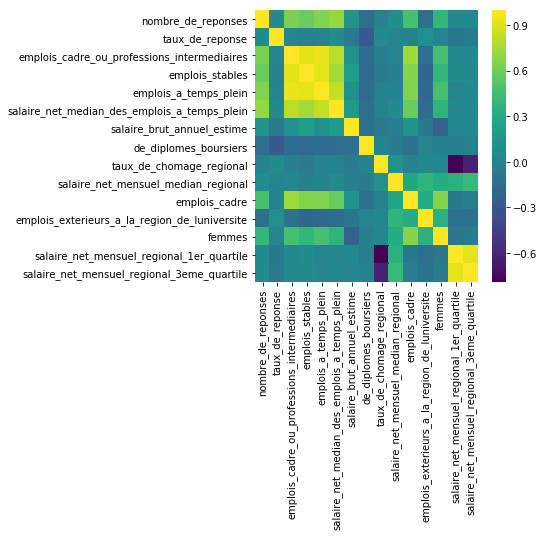

In [55]:
mat_corr=X_train.copy()
plt.figure(figsize=(5,5))
corr = mat_corr.corr()
print(sns.heatmap(corr,cmap='viridis'))

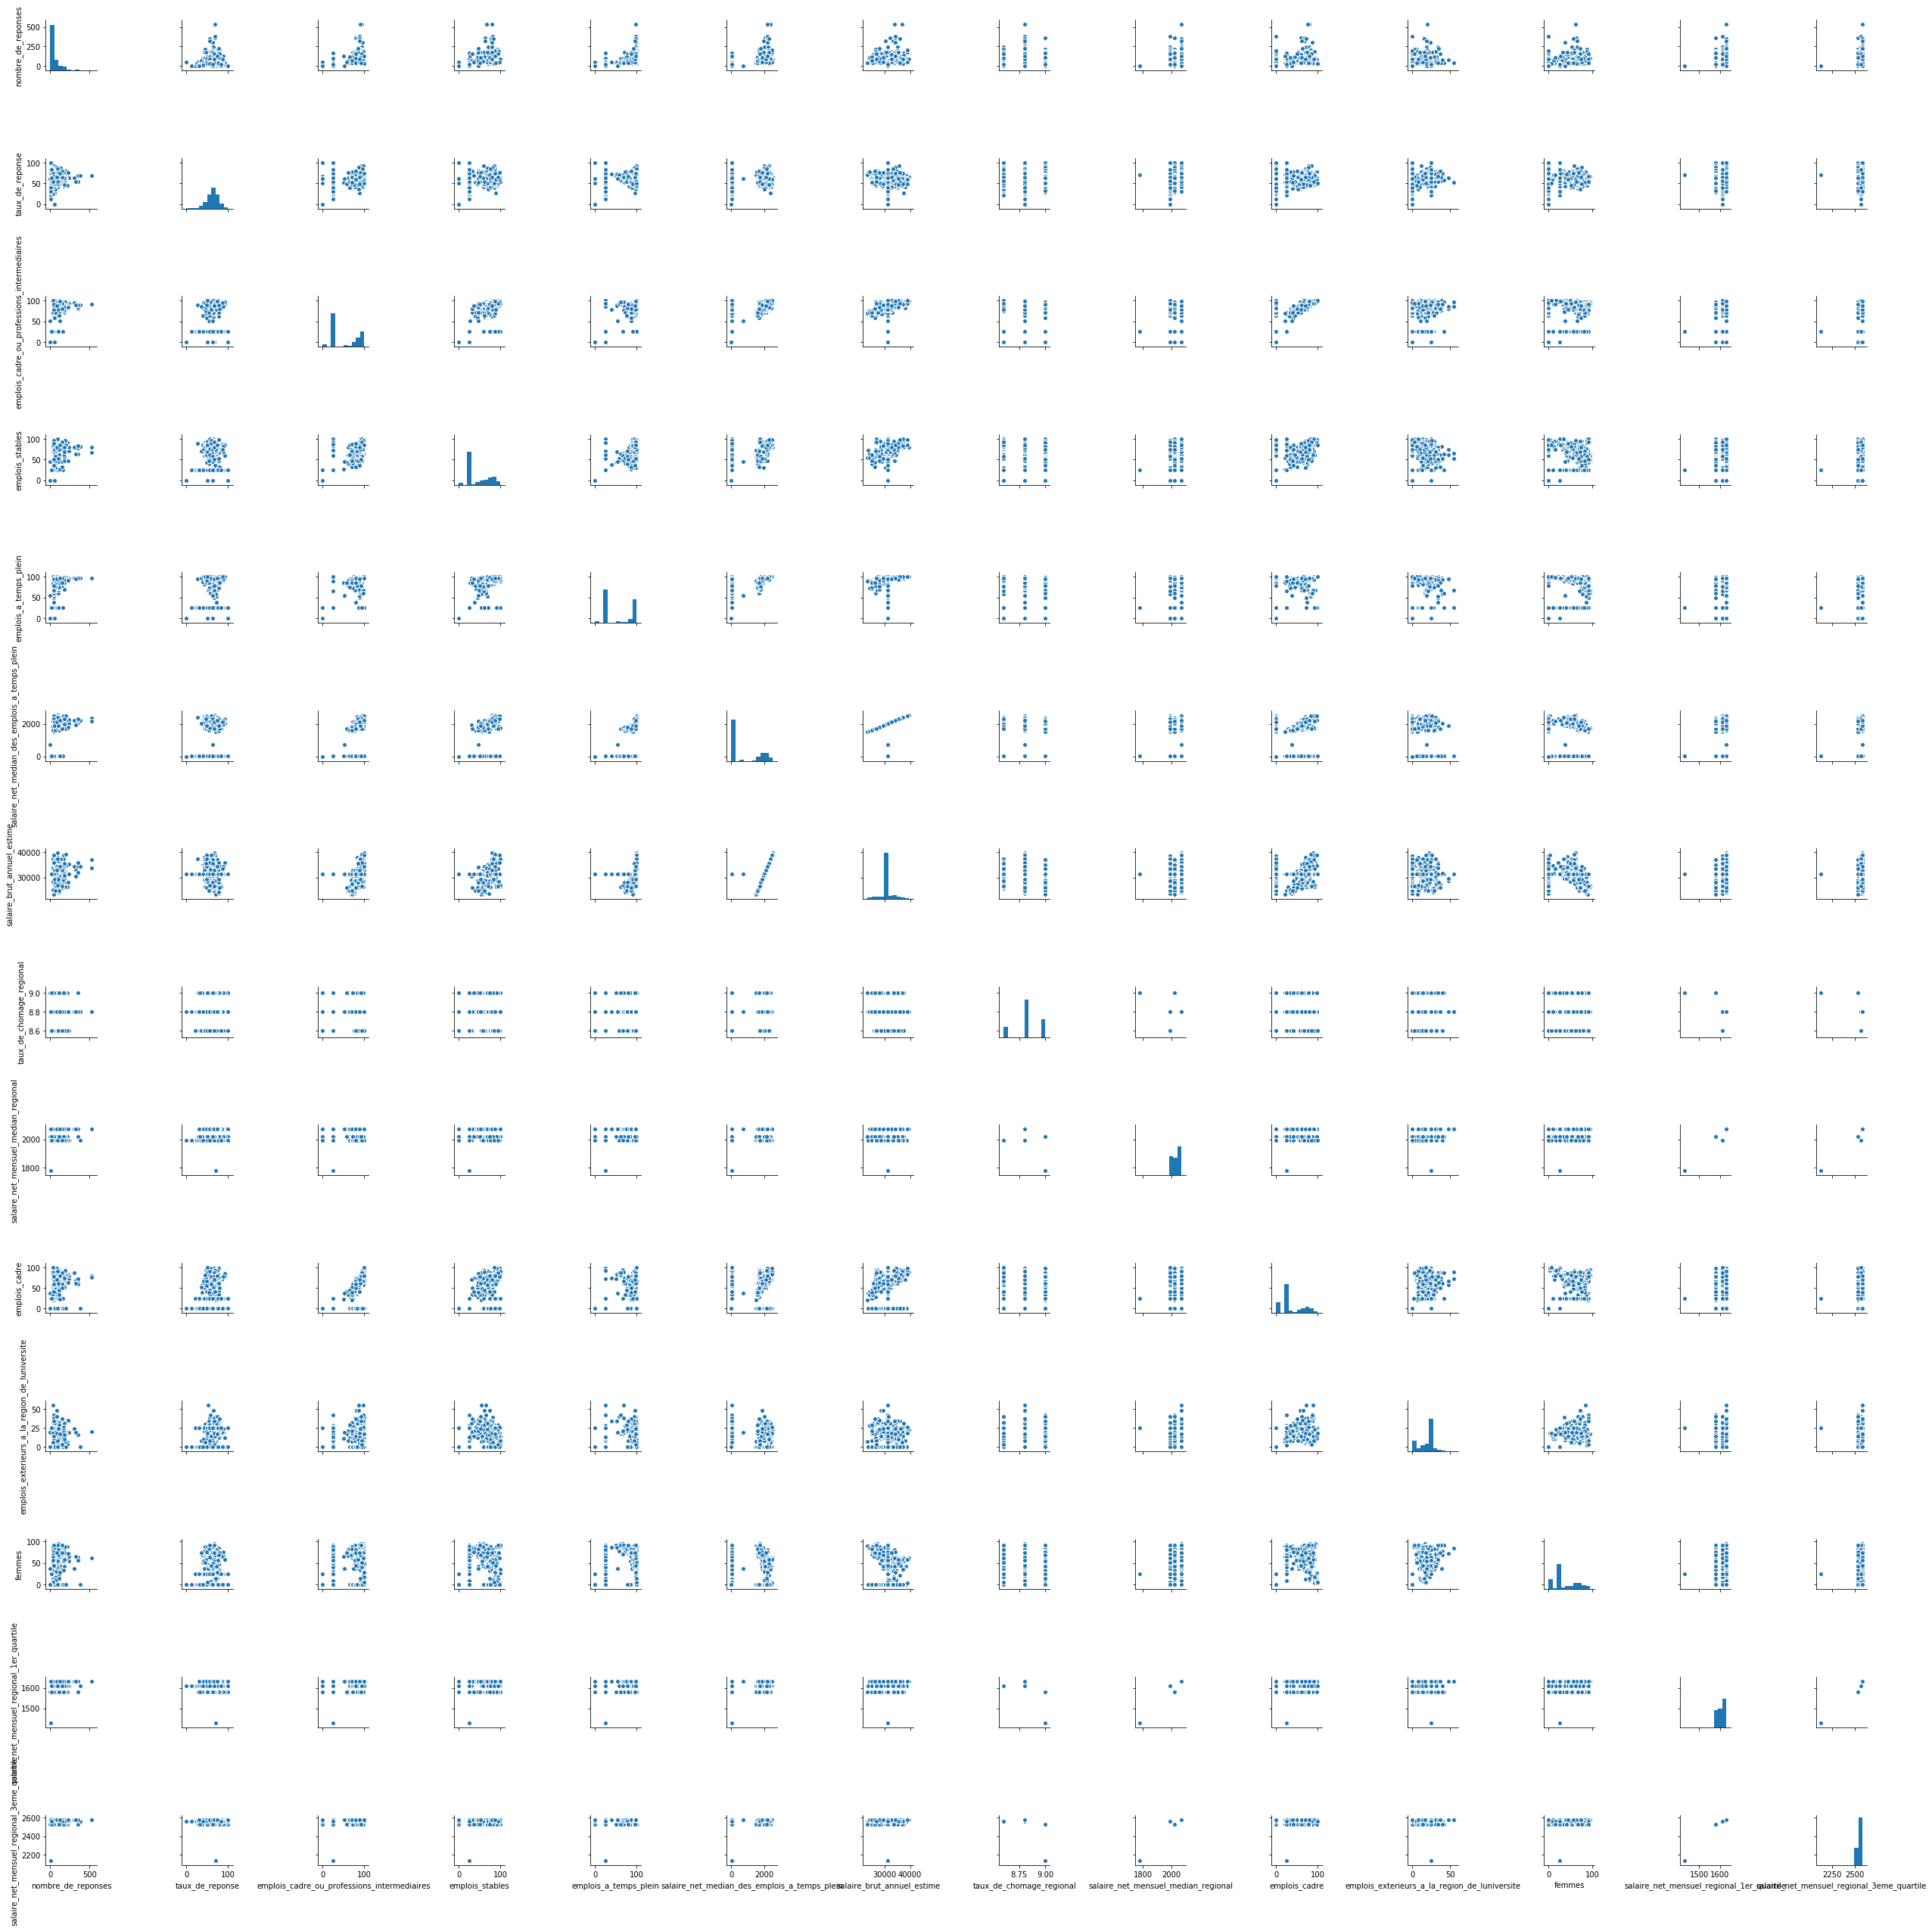

In [48]:
sns.pairplot(X_train,vars=X_train.columns)

In [56]:
X_train.columns

Index(['nombre_de_reponses', 'taux_de_reponse',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein', 'salaire_net_median_des_emplois_a_temps_plein',
       'salaire_brut_annuel_estime', 'de_diplomes_boursiers',
       'taux_de_chomage_regional', 'salaire_net_mensuel_median_regional',
       'emplois_cadre', 'emplois_exterieurs_a_la_region_de_luniversite',
       'femmes', 'salaire_net_mensuel_regional_1er_quartile',
       'salaire_net_mensuel_regional_3eme_quartile'],
      dtype='object')

(array([  80.,  163.,  276.,  132.,   30.,    0.,    0.,    0.,    0.,    2.]),
 array([  7.,  13.,  19.,  25.,  31.,  37.,  43.,  49.,  55.,  61.,  67.]),
 <a list of 10 Patch objects>)

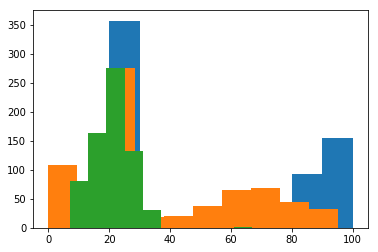

In [62]:
plt.hist(np.array(X_train['emplois_cadre_ou_professions_intermediaires']))
plt.hist(np.array(X_train['femmes']))
plt.hist(np.array(X_train['de_diplomes_boursiers']))

(array([   2.,    0.,    0.,    0.,    0.,    0.,    0.,  182.,    0.,  499.]),
 array([ 1430.,  1450.,  1470.,  1490.,  1510.,  1530.,  1550.,  1570.,
         1590.,  1610.,  1630.]),
 <a list of 10 Patch objects>)

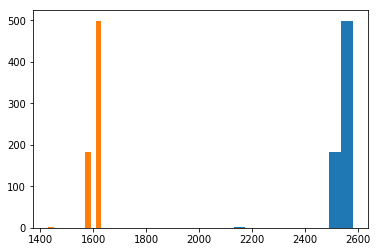

In [63]:
plt.hist(np.array(X_train['salaire_net_mensuel_regional_3eme_quartile']))
plt.hist(np.array(X_train['salaire_net_mensuel_regional_1er_quartile']))

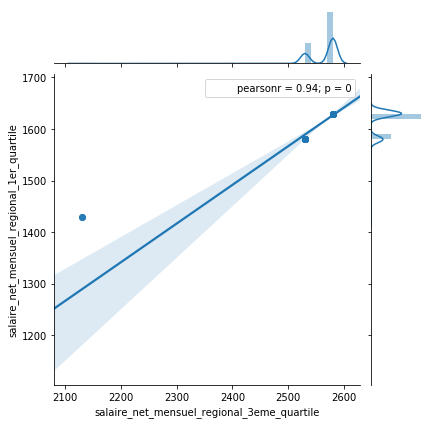

In [64]:
sns.jointplot("salaire_net_mensuel_regional_3eme_quartile", "salaire_net_mensuel_regional_1er_quartile", data=tab,kind="reg")

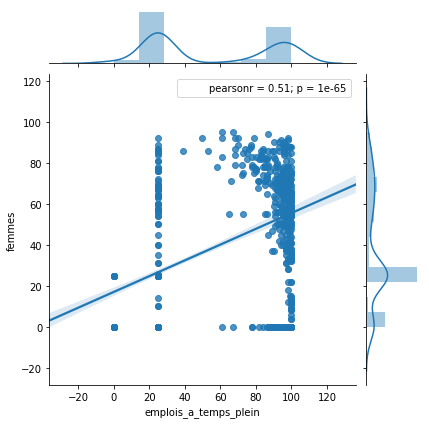

In [69]:
sns.jointplot("emplois_a_temps_plein", "femmes", data=tab,kind="reg")

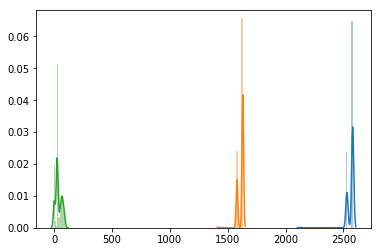

In [72]:
sns.distplot(np.array(X_train['salaire_net_mensuel_regional_3eme_quartile']))
sns.distplot(np.array(X_train['salaire_net_mensuel_regional_1er_quartile']))
sns.distplot(np.array(X_train['femmes']))
plt.figure()

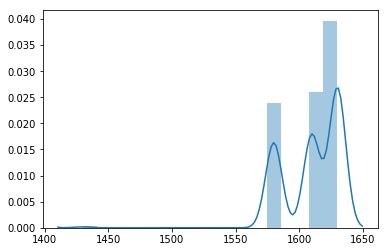

In [61]:
sns.distplot(np.array(X_train['salaire_net_mensuel_regional_1er_quartile']))
plt.figure()

In [35]:
#La commande .info() permet d'afficher des informations sur les variables d'un dataframe pandas 
#tab.info() 
# Object signifie string, donc par forcément catégorielle.

In [36]:
"""for k in tab.columns:
    if k not in ['nombre_de_reponses','taux_de_reponse','salaire_brut_annuel_estime' ]:
        tab[k]=tab[k].astype("float64")"""

'for k in tab.columns:\n    if k not in [\'nombre_de_reponses\',\'taux_de_reponse\',\'salaire_brut_annuel_estime\' ]:\n        tab[k]=tab[k].astype("float64")'

Axes(0.125,0.125;0.62x0.755)


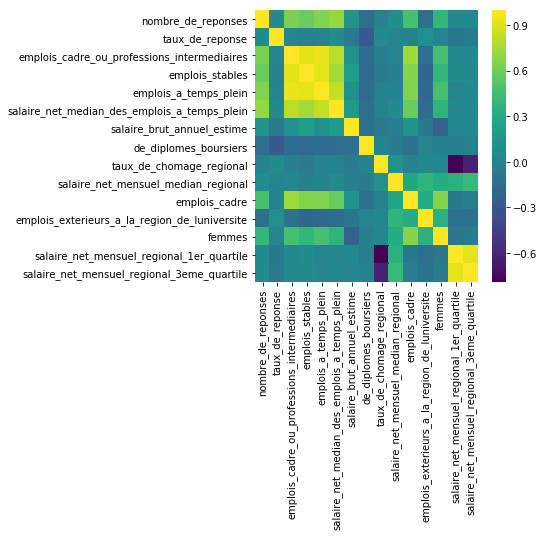

In [73]:
mat_corr=X_train.copy()
plt.figure(figsize=(5,5))
corr = mat_corr.corr()
print(sns.heatmap(corr,cmap='viridis'))

In [74]:
clf = RandomForestRegressor(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
#print(clf.feature_importances_)
selec = clf.feature_importances_
var_select = [X_train.columns[k] for k in range(len(selec)) if selec[k] !=0]
#selec[0]   
#X_train.columns[0]
X_train_selecte = X_train[var_select]
X_test_selecte = X_test[var_select]
clf.fit(X_train_selecte,y_train)
pred = clf.predict(X_test_selecte)

#print(len(pred.values))
print(explained_variance_score(y_test,pred))

#print(len(pred),len(y_test)) 
"""mat_corr_select=X_train_selecte.copy()
plt.figure(figsize=(5,5))
corr_select = mat_corr_select.corr()
print(sns.heatmap(corr_select,cmap='viridis')) 0.92720416802"""

0.919014402727


"mat_corr_select=X_train_selecte.copy()\nplt.figure(figsize=(5,5))\ncorr_select = mat_corr_select.corr()\nprint(sns.heatmap(corr_select,cmap='viridis')) 0.92720416802"

In [145]:

#tab.info()

In [38]:
tab.describe()

,nombre_de_reponses,taux_de_reponse,taux_dinsertion,emplois_cadre_ou_professions_intermediaires,emplois_stables,emplois_a_temps_plein,salaire_net_median_des_emplois_a_temps_plein,salaire_brut_annuel_estime,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile
count,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,52.448560,62.037313,57.248958,51.825000,45.765625,54.680208,726.760417,31333.235294,8.826434,2032.971311,37.809375,18.884134,38.108333,1609.829545,2559.119318
std,63.325682,14.563167,32.939439,32.519511,26.570859,35.161150,952.464455,2163.888817,0.129686,35.959852,27.480195,10.226769,26.667501,22.270586,28.429922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23400.000000,8.600000,1780.000000,0.000000,0.000000,0.000000,1430.000000,2130.000000
25%,12.000000,54.000000,25.000000,25.000000,25.000000,25.000000,25.000000,31333.235294,8.800000,1990.000000,25.000000,12.000000,25.000000,1580.000000,2530.000000
50%,30.000000,63.000000,69.500000,25.000000,25.000000,25.000000,25.000000,31333.235294,8.800000,2020.000000,25.000000,25.000000,25.000000,1609.829545,2559.119318
75%,68.000000,71.000000,90.000000,88.000000,71.000000,96.000000,1850.000000,31333.235294,9.000000,2070.000000,64.000000,25.000000,62.000000,1630.000000,2580.000000
max,531.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2540.000000,39600.000000,9.000000,2070.000000,100.000000,55.000000,95.000000,1630.000000,2580.000000


In [63]:
"""
mat_corr=tab.copy()
plt.figure(figsize=(10,10))
corr = mat_corr.corr()
print(sns.heatmap(corr,cmap='viridis'))
# on remarque qu on a une forte corelation entre differente variable """

"\nmat_corr=tab.copy()\nplt.figure(figsize=(10,10))\ncorr = mat_corr.corr()\nprint(sns.heatmap(corr,cmap='viridis'))\n# on remarque qu on a une forte corelation entre differente variable "

(array([ 152.,   13.,  388.,   24.,   44.,   65.,   83.,   91.,   70.,   46.]),
 array([  0. ,   9.5,  19. ,  28.5,  38. ,  47.5,  57. ,  66.5,  76. ,
         85.5,  95. ]),
 <a list of 10 Patch objects>)

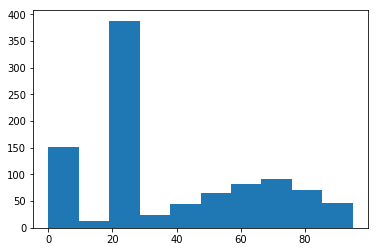

In [40]:
#tab.hist(figsize=(20, 20), bins=50, layout=(7, 6)); #Pas mal de features catégorielles
#plt.boxplot(tab['taux_dinsertion'])
#plt.hist(tab['taux_de_reponse'])


"""
plt.hist(np.array(tab['taux_de_reponse']))
plt.hist(np.array(tab['taux_dinsertion']))
plt.hist(np.array(tab['nombre_de_reponses']))
plt.hist(np.array(tab['emplois_cadre_ou_professions_intermediaires']))
plt.hist(np.array(tab['emplois_stables']))
plt.hist(np.array(tab['emplois_a_temps_plein']))
plt.hist(np.array(tab['salaire_net_median_des_emplois_a_temps_plein']))
plt.hist(np.array(tab['emplois_cadre']))
plt.hist(np.array(tab['salaire_net_mensuel_regional_1er_quartile']))
plt.hist(np.array(tab['salaire_net_mensuel_regional_3eme_quartile']))
"""
plt.hist(np.array(tab['femmes']))


# PCA skelearn

In [90]:
pca=PCA()                    
acp = pca.fit(X_train)
comp_princ=pca.explained_variance_ratio_
acp2 = pca.fit_transform(X_train)
#selct=pca.fit(X_train)
#var_sel=selct.get_support(indices = True)
#colname_selected = [tab.columns[i] for i in var_sel]
#tab.columns
#pca.get_params(deep = True)
#var_sel
#selct.transform(X_train)
print(acp.components_.T[:, 0])
#print(len(X_train),len(acp2))

[  4.94419582e-03  -3.59789867e-04   2.49290007e-03   2.86483637e-03
   2.38465000e-03   1.01687910e-01   9.94787165e-01  -3.53670597e-04
  -3.17851752e-06  -5.59622439e-04   2.14077622e-03  -3.60316443e-04
  -2.75284359e-03   5.60891115e-04   5.82651285e-04]


In [91]:
pca=PCA(n_components=0.95)                    
X_train_reduce = pca.fit_transform(X_train)
"""for k in X_train.columns:
    if X_train_reduce[:,0] == X_train[k]:
        print(k)
"""
#[k for k in X_train.columns if  X_train_reduce[:,0] == X_train[k].values]
#X_train.columns
#X_train['nombre_de_reponses'].all()
pca.components_

array([[  4.94419582e-03,  -3.59789867e-04,   2.49290007e-03,
          2.86483637e-03,   2.38465000e-03,   1.01687910e-01,
          9.94787165e-01,  -3.53670597e-04,  -3.17851752e-06,
         -5.59622439e-04,   2.14077622e-03,  -3.60316443e-04,
         -2.75284359e-03,   5.60891115e-04,   5.82651285e-04],
       [  4.62693159e-02,   1.13200815e-03,   2.76165985e-02,
          2.03581843e-02,   3.07467159e-02,   9.92428487e-01,
         -1.01879307e-01,  -8.02798444e-04,   3.61699150e-06,
          2.76854148e-03,   1.65293415e-02,  -1.58189815e-03,
          1.24803460e-02,   6.41023682e-04,   1.21645835e-03]])

In [99]:
print('X_train_reduice',X_train_reduce.shape,'X_train',X_train.shape)

X_train_reduice (683, 2) X_train (683, 14)


In [92]:
Missing_values(tab)

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 



In [93]:
t=projet(tab)
#t.myPCA()
#t.repr_vp()
t.matrice_cov()

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


array([  8.40854968e-01,   1.57782440e-01,   3.97985092e-04,
         3.27350291e-04,   2.52216517e-04,   1.83318285e-04,
         5.77687710e-05,   4.53849126e-05,   3.78319321e-05,
         1.92808518e-05,   1.16322085e-05,   9.30961058e-06,
         7.91822714e-06,   6.94325663e-06,   5.65164597e-06,
         1.46222271e-10])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


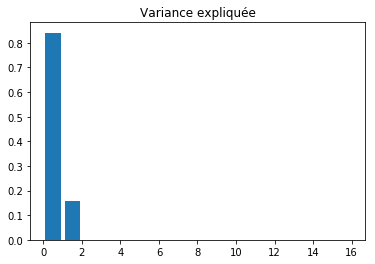

In [94]:
t.repr_vp()

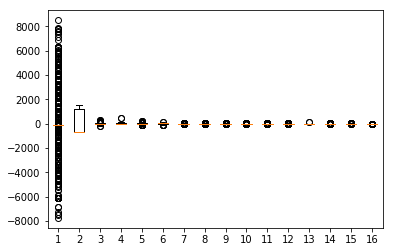

In [95]:
#def boit_npre_comp(A):
#        c=pca.fit(A).transform(A)
#        plt.boxplot(c[:,0:20])
        
        
t.boit_npre_comp()

In [96]:
tab.shape

(976, 16)

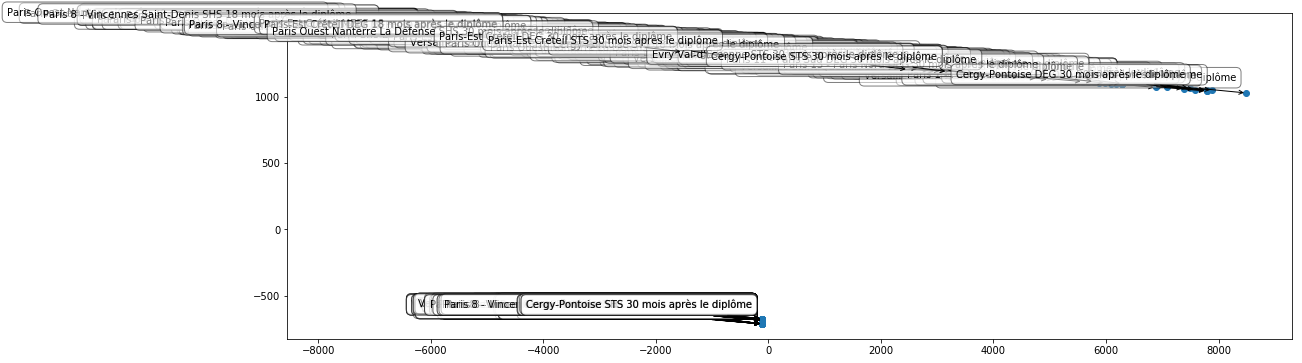

In [127]:
t.repr_obs_plan()

In [82]:
t.myPCA()

(                                                   PC-0      PC-1      PC-2  \
 nombre_de_reponses                             0.307803 -0.013800  0.065005   
 taux_de_reponse                                0.042352  0.057399 -0.063029   
 taux_dinsertion                                0.368208 -0.021154  0.012034   
 emplois_cadre_ou_professions_intermediaires    0.392576 -0.003313  0.074105   
 emplois_stables                                0.378481 -0.019369  0.138139   
 emplois_a_temps_plein                          0.392168  0.004558  0.106190   
 salaire_net_median_des_emplois_a_temps_plein   0.355600  0.000105  0.117833   
 salaire_brut_annuel_estime                     0.052052 -0.059216  0.225270   
 de_diplomes_boursiers                         -0.090884 -0.009221 -0.007818   
 taux_de_chomage_regional                       0.001682  0.503971 -0.059199   
 salaire_net_mensuel_median_regional            0.044435 -0.171479 -0.541000   
 emplois_cadre                          

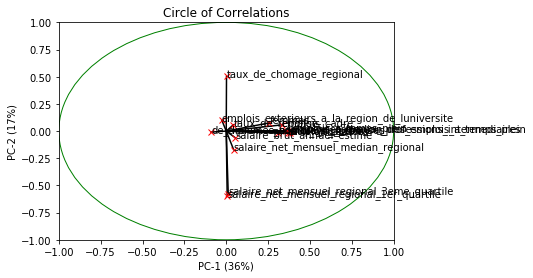

In [98]:
t1,t2 = t.myPCA()
circleOfCorrelations(t1,t2)

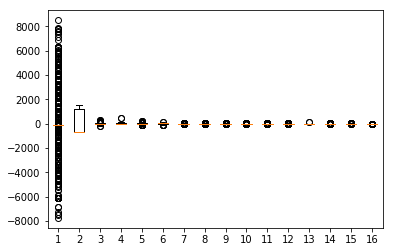

In [84]:
t.boit_npre_comp()

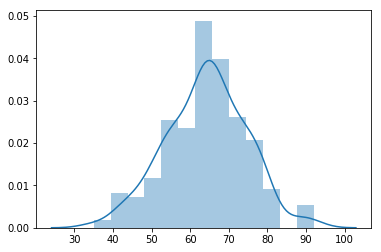

In [204]:
sns.distplot(np.array(tab['taux_de_reponse']))
plt.figure()

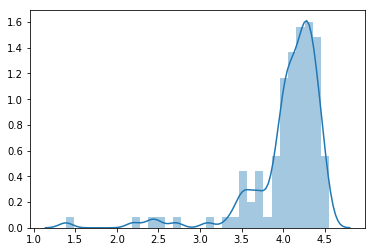

In [207]:
sns.distplot(np.log(np.array(tab['femmes'])))
plt.figure()

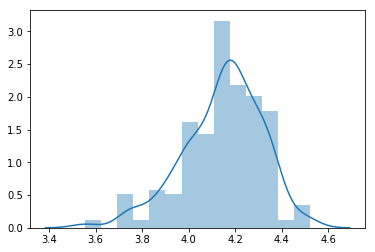

In [211]:
sns.distplot(np.log(np.array(tab['taux_de_reponse'])))
plt.figure()

# CAH

In [214]:
from sklearn.cluster import AgglomerativeClustering

In [223]:
clf = AgglomerativeClustering(n_clusters=6, affinity='euclidean', 
    memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', 
                                             pooling_func=callable)
clf.fit(tab)
clf.fit_predict(tab)

array([4, 4, 4, 2, 5, 2, 5, 0, 2, 1, 0, 1, 0, 4, 2, 0, 0, 4, 5, 0, 2, 4, 2,
       3, 5, 5, 3, 2, 3, 1, 0, 2, 4, 2, 0, 3, 5, 0, 3, 2, 3, 1, 2, 2, 3, 0,
       0, 4, 2, 2, 0, 2, 0, 4, 1, 0, 0, 4, 0, 4, 4, 3, 5, 2, 4, 4, 2, 0, 4,
       2, 2, 1, 5, 2, 4, 2, 0, 4, 0, 4, 0, 2, 0, 0, 0, 3, 2, 2, 0, 1, 3, 4,
       3, 0, 0, 2, 2, 4, 0, 2, 1, 0, 1, 4, 1, 5, 0, 3, 2, 4, 1, 2, 0, 4, 2,
       3, 0, 1, 1, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 4, 2, 0, 4, 0, 3, 3, 4, 3,
       2, 4, 0, 1, 3, 3, 5, 3, 4, 3, 2, 1, 1, 2, 2, 1, 5, 5, 3, 1, 2, 0, 3,
       0, 2, 3, 1, 0, 2, 0, 2, 4, 2, 4, 0, 0, 1, 0, 1, 0, 3, 0, 1, 2, 4, 0,
       2, 4, 1, 4, 0, 2, 5, 3, 3, 5, 1, 4, 0, 0, 1, 0, 1, 5, 4, 3, 5, 4, 0,
       1, 3, 4, 3, 0, 0, 3, 2, 4, 0, 0, 1, 2, 2, 4, 0, 4, 4, 4, 0, 0, 0, 0,
       4, 0, 3, 3, 3, 0, 3, 5, 3, 0, 4, 4, 4, 4, 1, 2, 3, 3, 3, 3, 0, 4], dtype=int64)

In [227]:
t=clf.get_params()

{'affinity': 'euclidean',
 'compute_full_tree': 'auto',
 'connectivity': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 6,
 'pooling_func': <function callable>}

In [208]:
pca=PCA()
print(pca.fit(tab))
print(pd.Dataframe(pca.fit_transform(tab)))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


AttributeError: module 'pandas' has no attribute 'Dataframe'

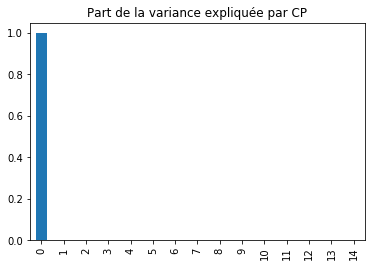

In [209]:
plt.figure()
scree = pd.Series(comp_princ)
scree.plot(kind='bar', title=u"Part de la variance expliquée par CP")

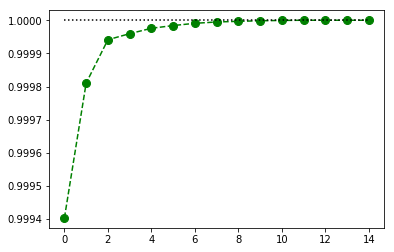

In [210]:
plt.figure()
cum = scree.cumsum()
plt.plot(range(cum.size),cum,'o--', markersize=8, color='green')
plt.plot(range(cum.size),np.ones(cum.size),':',  color='black')

In [86]:
def myPCA(df):
    # Normalize data
    df_norm = (df - df.mean()) / df.std()
    # PCA
    pca = PCA()
    pca_res = pca.fit_transform(df_norm.values)
    # Ebouli
    ebouli = pd.Series(pca.explained_variance_ratio_)
    coef = np.transpose(pca.components_)
    cols = ['PC-'+str(x) for x in range(len(ebouli))]
    pc_infos = pd.DataFrame(coef, columns=cols, index=df_norm.columns)
    return pc_infos, ebouli  

def circleOfCorrelations(pc_infos, ebouli):
    plt.Circle((0,0),radius=10, color='g', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)
    for idx in range(len(pc_infos["PC-0"])):
        x = pc_infos["PC-0"][idx]
        y = pc_infos["PC-1"][idx]
        plt.plot([0.0,x],[0.0,y],'k-')
        plt.plot(x, y, 'rx')
        plt.annotate(pc_infos.index[idx], xy=(x,y))
    plt.xlabel("PC-1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."))
    plt.ylabel("PC-2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."))
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title("Circle of Correlations")

In [87]:
myPCA(tab)

(                                                   PC-0      PC-1      PC-2  \
 nombre_de_reponses                             0.307803 -0.013800  0.065005   
 taux_de_reponse                                0.042352  0.057399 -0.063029   
 taux_dinsertion                                0.368208 -0.021154  0.012034   
 emplois_cadre_ou_professions_intermediaires    0.392576 -0.003313  0.074105   
 emplois_stables                                0.378481 -0.019369  0.138139   
 emplois_a_temps_plein                          0.392168  0.004558  0.106190   
 salaire_net_median_des_emplois_a_temps_plein   0.355600  0.000105  0.117833   
 salaire_brut_annuel_estime                     0.052052 -0.059216  0.225270   
 de_diplomes_boursiers                         -0.090884 -0.009221 -0.007818   
 taux_de_chomage_regional                       0.001682  0.503971 -0.059199   
 salaire_net_mensuel_median_regional            0.044435 -0.171479 -0.541000   
 emplois_cadre                          

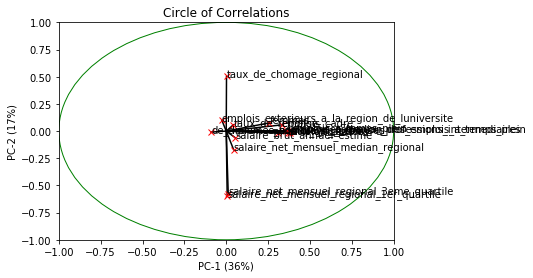

In [88]:
t,t1 = myPCA(tab)
circleOfCorrelations(t,t1)

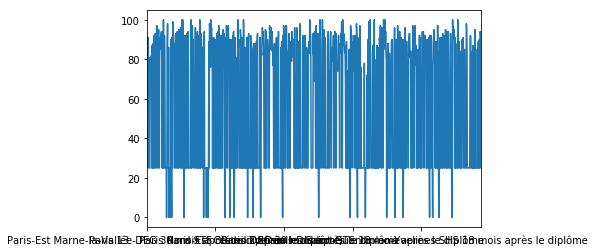

In [21]:
tab.taux_dinsertion.interpolate().plot()

# data visualisation

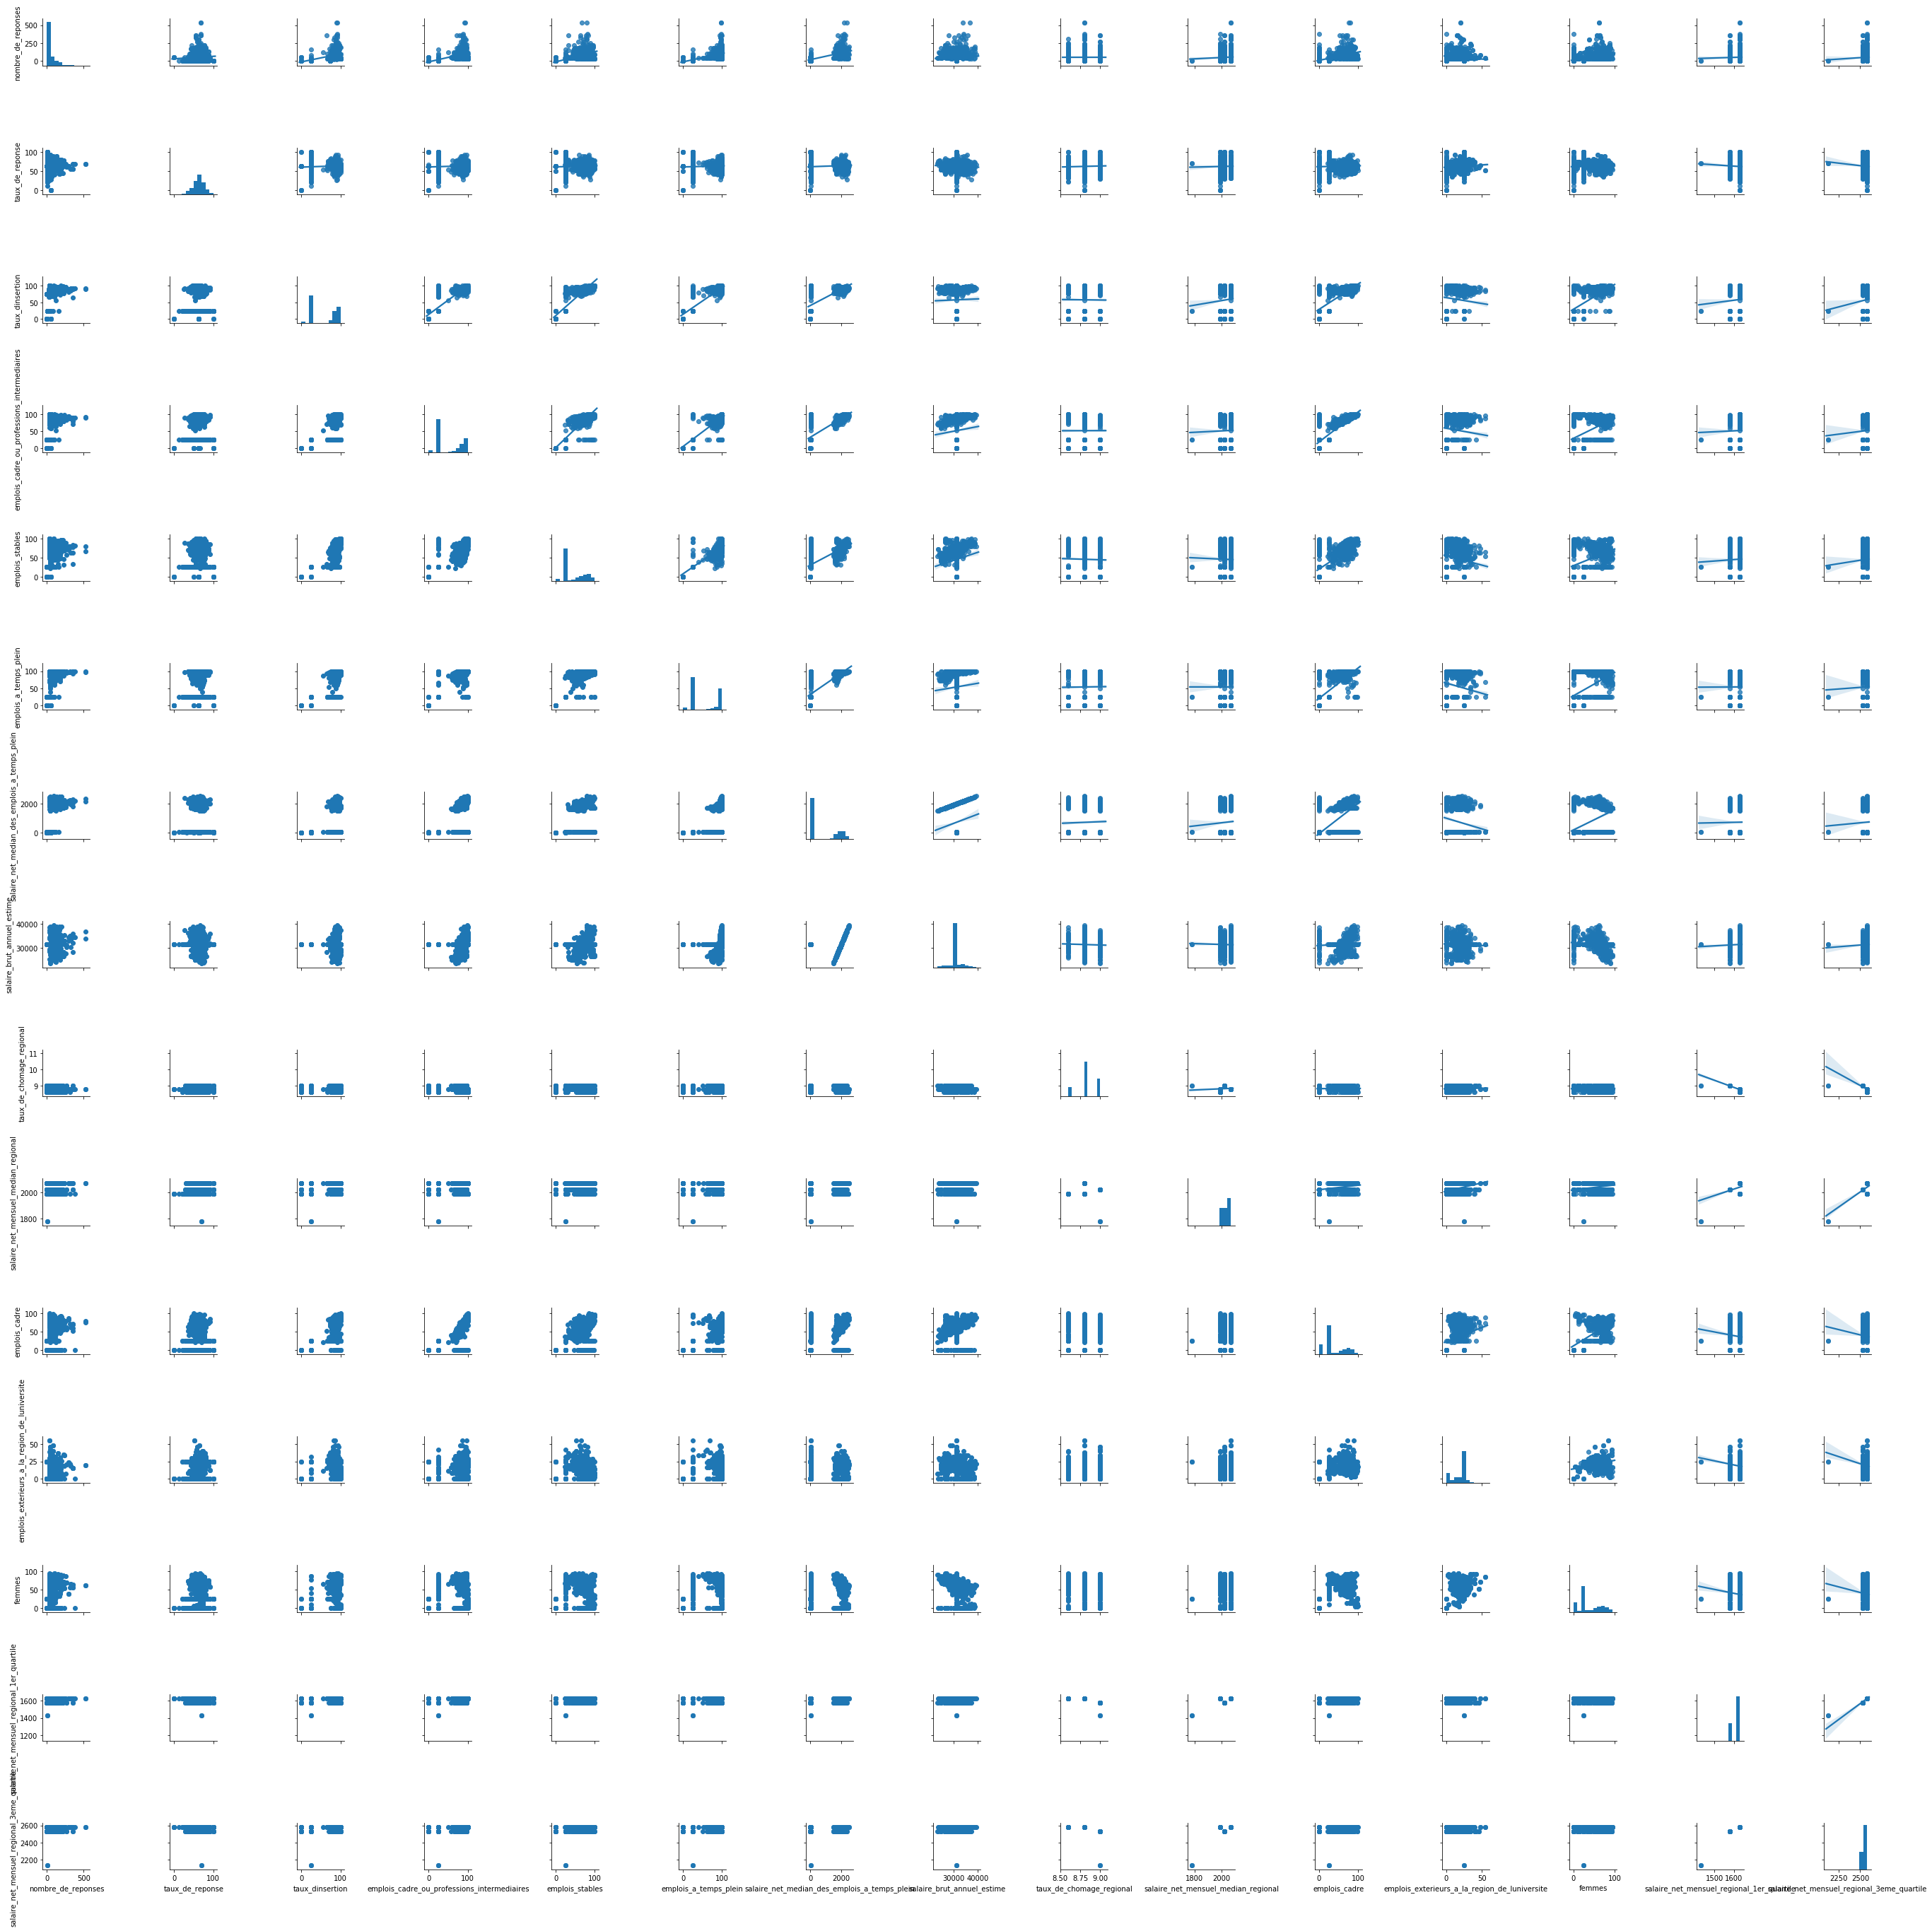

In [22]:
g = sns.PairGrid(tab)
g.map_upper(sns.regplot) 
g.map_lower(plt.scatter)
g.map_diag(plt.hist)  
plt.show()

In [28]:
#coefficirnt de correlation de varoable
tab.ix[:,].corr().round(2)

,nombre_de_reponses,taux_de_reponse,taux_dinsertion,emplois_cadre_ou_professions_intermediaires,emplois_stables,emplois_a_temps_plein,salaire_net_median_des_emplois_a_temps_plein,salaire_brut_annuel_estime,taux_de_chomage_regional,salaire_net_mensuel_median_regional,emplois_cadre,emplois_exterieurs_a_la_region_de_luniversite,femmes,salaire_net_mensuel_regional_1er_quartile,salaire_net_mensuel_regional_3eme_quartile
nombre_de_reponses,1.00,0.08,0.59,0.65,0.60,0.66,0.71,0.06,0.00,0.05,0.50,-0.13,0.41,0.03,0.04
taux_de_reponse,0.08,1.00,0.08,0.07,0.06,0.07,0.09,-0.04,0.05,0.02,0.04,0.08,0.04,-0.06,-0.05
taux_dinsertion,0.59,0.08,1.00,0.85,0.84,0.86,0.70,0.02,-0.01,0.07,0.63,-0.11,0.60,0.06,0.06
emplois_cadre_ou_professions_intermediaires,0.65,0.07,0.85,1.00,0.91,0.95,0.82,0.09,0.00,0.02,0.76,-0.12,0.49,0.02,0.03
emplois_stables,0.60,0.06,0.84,0.91,1.00,0.92,0.76,0.17,-0.03,-0.02,0.69,-0.19,0.43,0.03,0.04
emplois_a_temps_plein,0.66,0.07,0.86,0.95,0.92,1.00,0.83,0.07,0.01,-0.00,0.69,-0.17,0.51,0.00,0.02
salaire_net_median_des_emplois_a_temps_plein,0.71,0.09,0.70,0.82,0.76,0.83,1.00,0.15,0.03,0.04,0.61,-0.16,0.40,0.01,0.02
salaire_brut_annuel_estime,0.06,-0.04,0.02,0.09,0.17,0.07,0.15,1.00,-0.06,-0.03,0.13,-0.06,-0.25,0.05,0.04
taux_de_chomage_regional,0.00,0.05,-0.01,0.00,-0.03,0.01,0.03,-0.06,1.00,0.10,0.03,0.05,0.04,-0.81,-0.67
salaire_net_mensuel_median_regional,0.05,0.02,0.07,0.02,-0.02,-0.00,0.04,-0.03,0.10,1.00,0.26,0.36,0.28,0.33,0.39


In [27]:
tab.columns

Index(['nombre_de_reponses', 'taux_de_reponse', 'taux_dinsertion',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein', 'salaire_net_median_des_emplois_a_temps_plein',
       'salaire_brut_annuel_estime', 'taux_de_chomage_regional',
       'salaire_net_mensuel_median_regional', 'emplois_cadre',
       'emplois_exterieurs_a_la_region_de_luniversite', 'femmes',
       'salaire_net_mensuel_regional_1er_quartile',
       'salaire_net_mensuel_regional_3eme_quartile'],
      dtype='object')

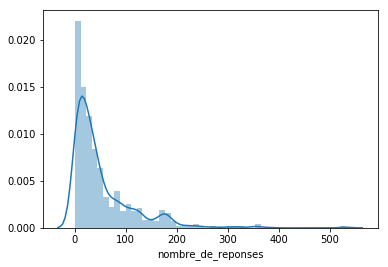

In [31]:
sns.distplot(tab.nombre_de_reponses)

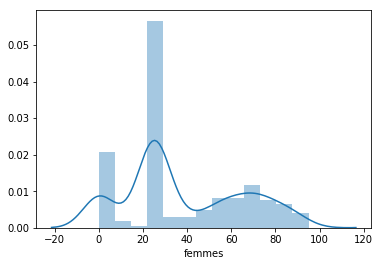

In [35]:
sns.distplot(tab.femmes)

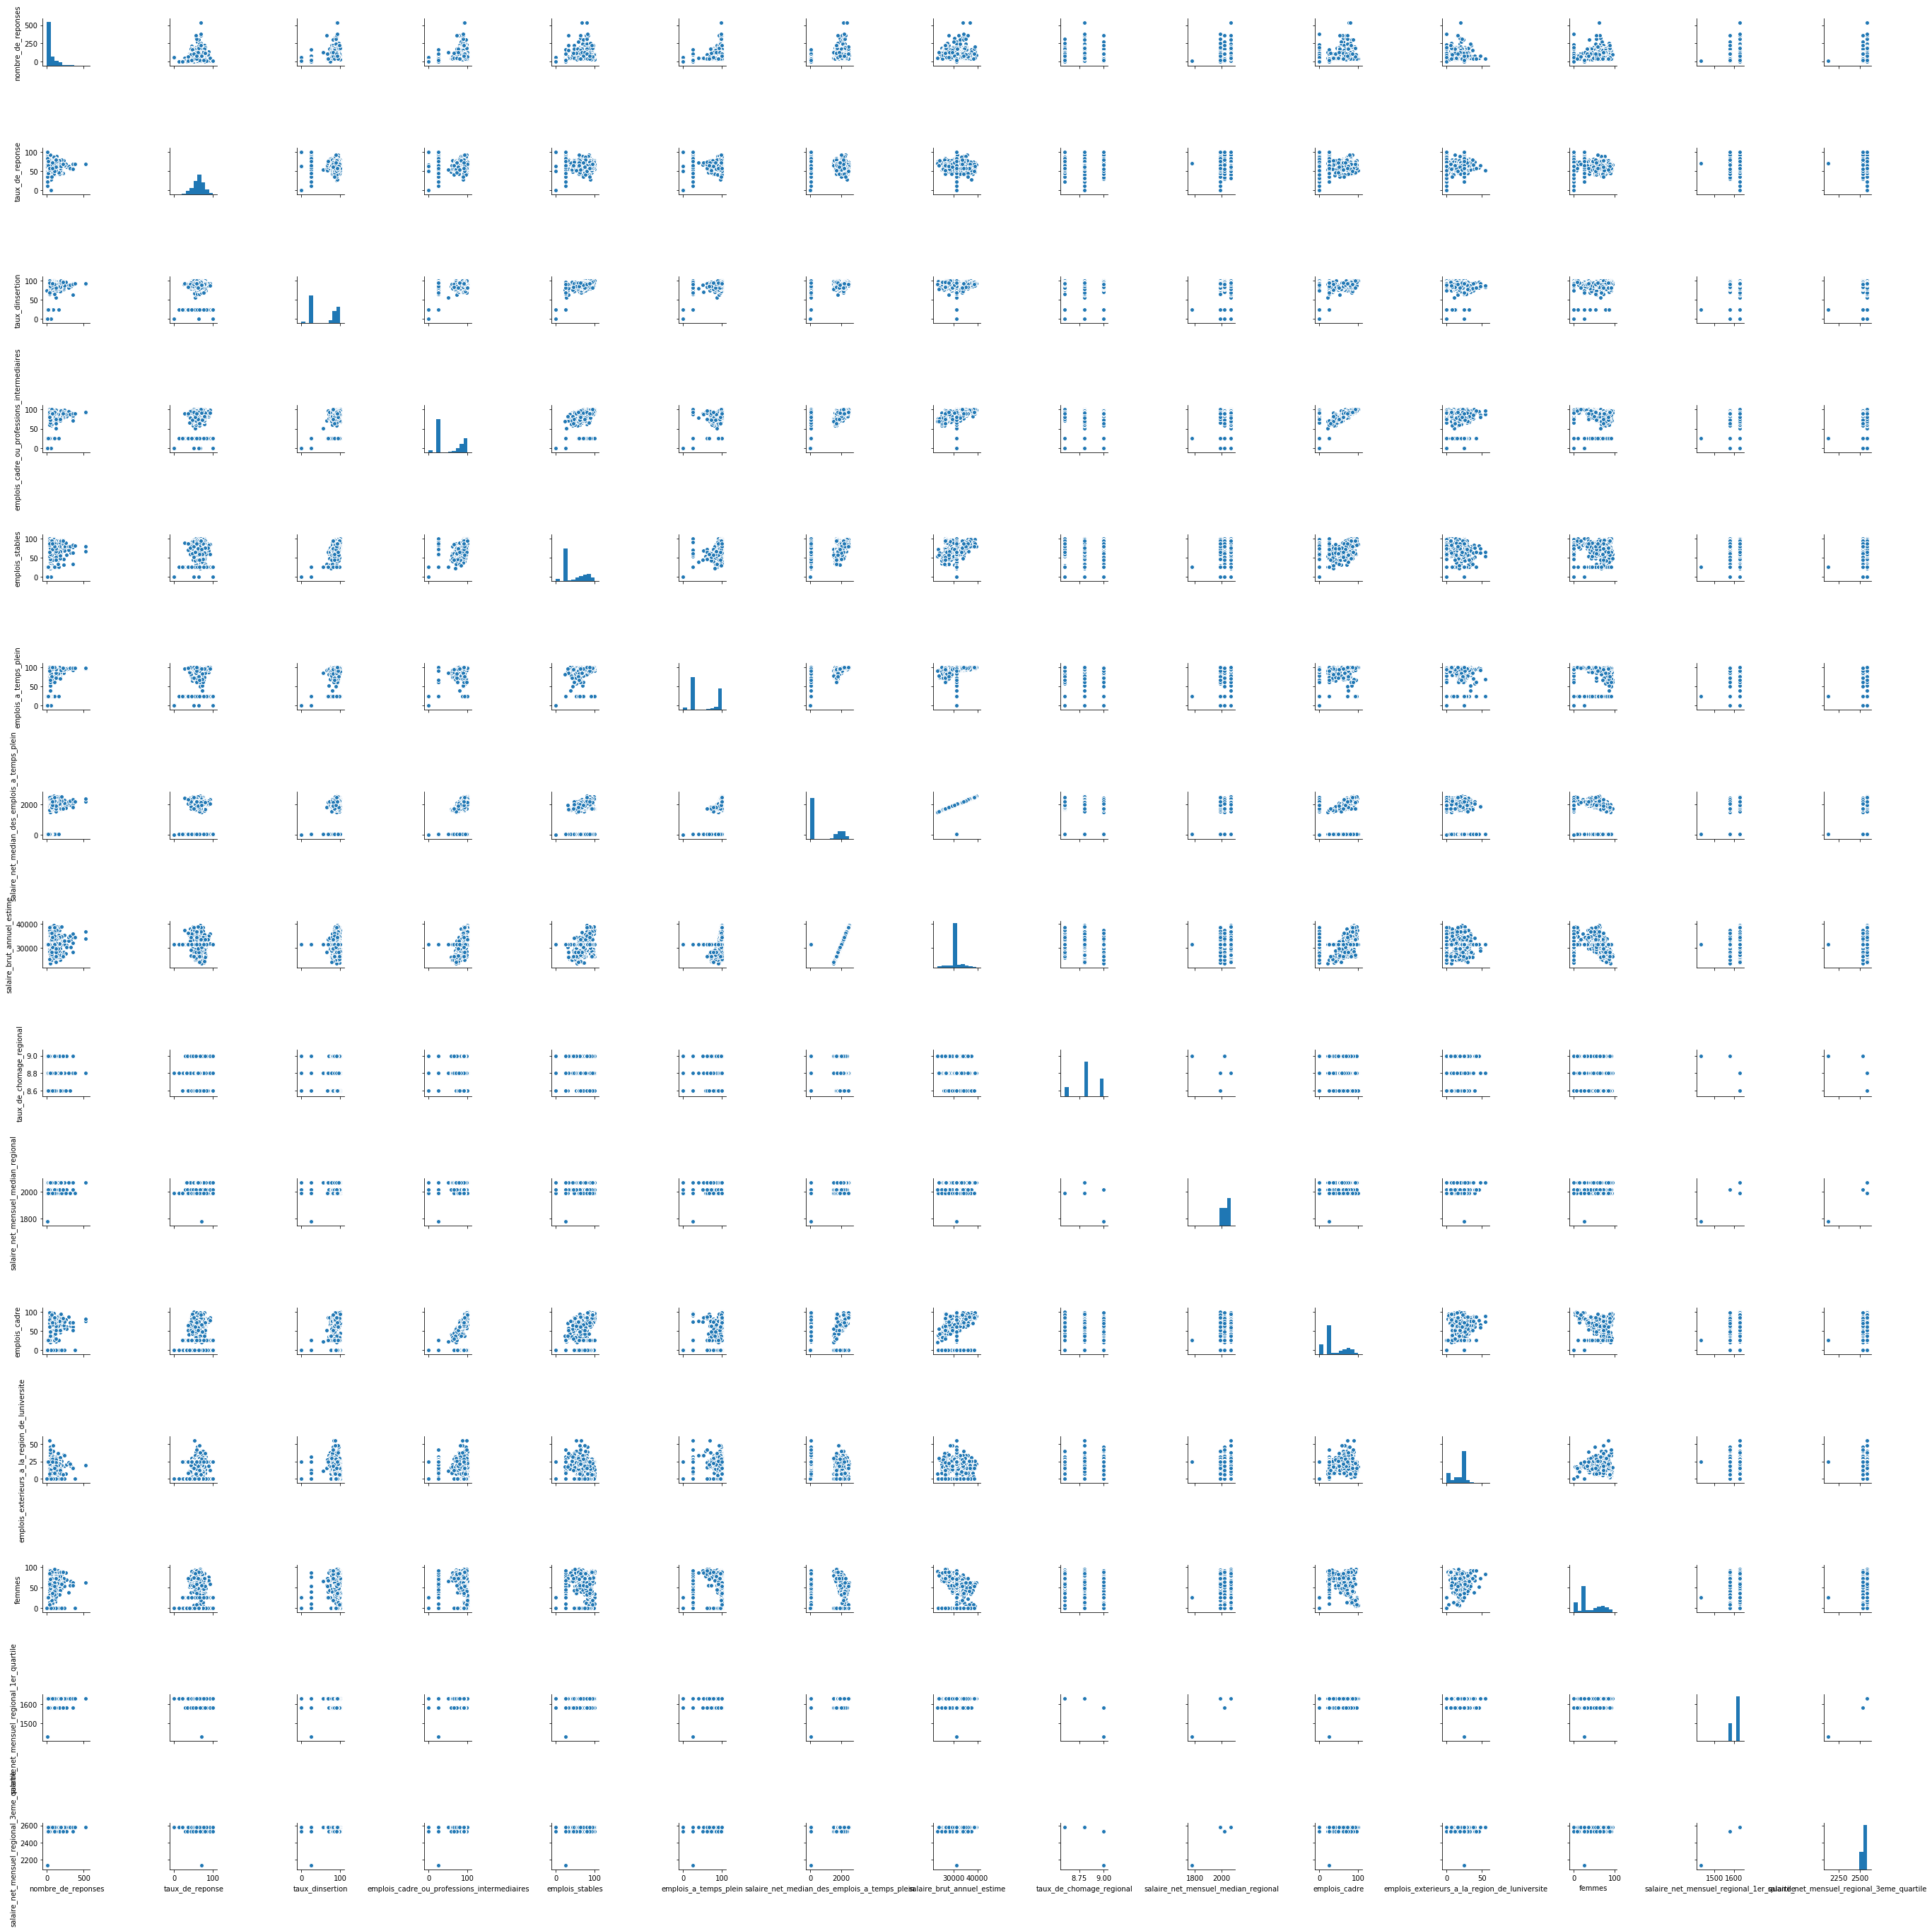

In [32]:
sns.pairplot(tab)

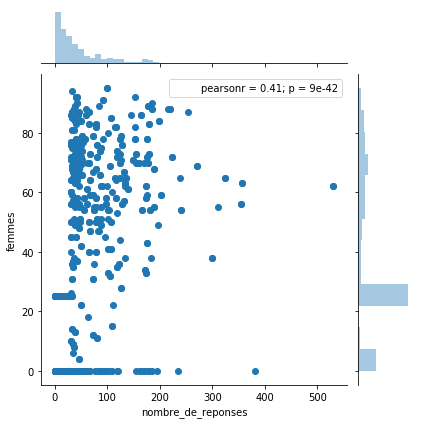

In [33]:
sns.jointplot(x="nombre_de_reponses", y="femmes", data=tab)

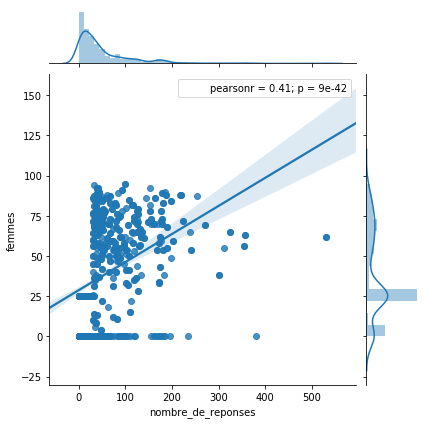

In [34]:
sns.jointplot("nombre_de_reponses", "femmes", data=tab,kind="reg")

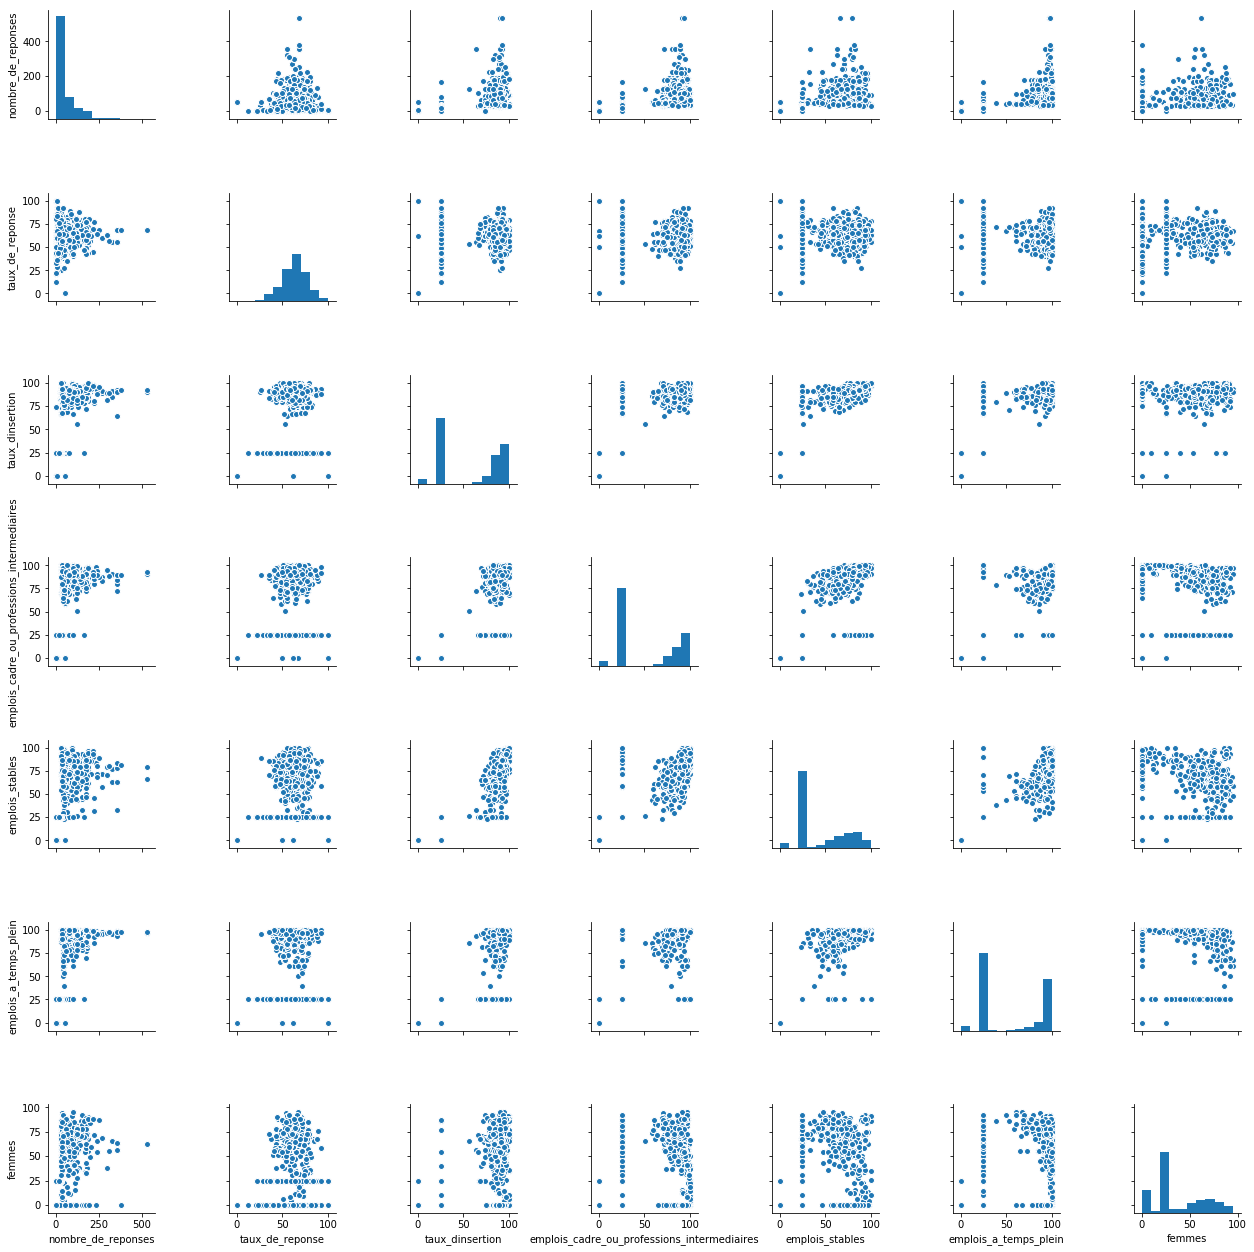

In [37]:
sns.pairplot(tab,vars=['nombre_de_reponses', 'taux_de_reponse', 'taux_dinsertion',
       'emplois_cadre_ou_professions_intermediaires', 'emplois_stables',
       'emplois_a_temps_plein','femmes'])